## Objective: 

The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset. Dataset: Use the breast cancer dataset available in the sklearn library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 1. Loading and Preprocessing 
​
Load the breast cancer dataset from sklearn. Preprocess the data to handle any missing values and perform necessary feature scaling. Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

In [2]:
from sklearn.datasets import load_breast_cancer  #loading Dataset From Sklearn

In [3]:
data=load_breast_cancer()

In [4]:
x=data.data
y=data.target
feature=data.feature_names

In [5]:
df=pd.DataFrame(x,columns=feature)
df['target']=y

In [6]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [7]:
df.info() #to get the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
# Checking Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
#checking null values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
#here we are checking duplicates in our dataset
df.duplicated().sum()

0

## Visualize the data and checking outliers

<Axes: xlabel='mean radius'>

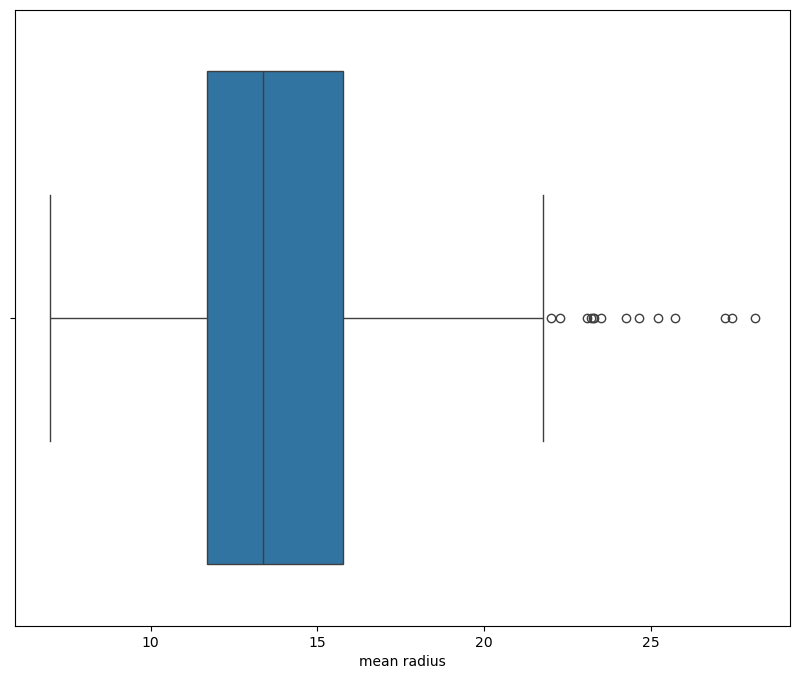

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['mean radius'])

#### collecting numerical columns together

In [12]:
 num_columns=df.select_dtypes(include='number')

In [13]:
num_columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

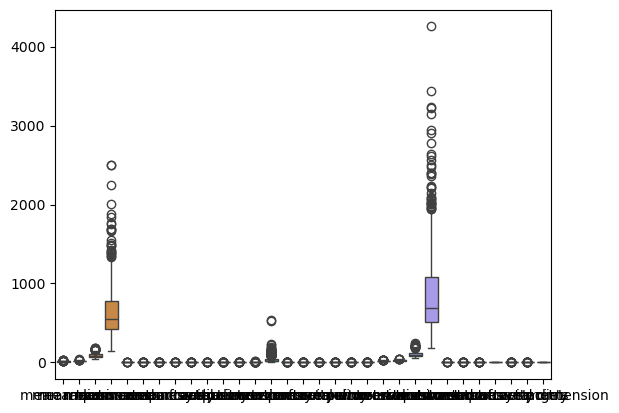

In [14]:
sns.boxplot(data=df)  # here , we can see entire data in a single visualization,

In [15]:
#now , we can see a single visualization of each column

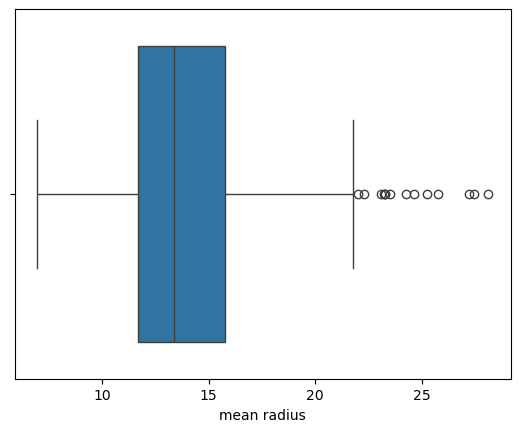

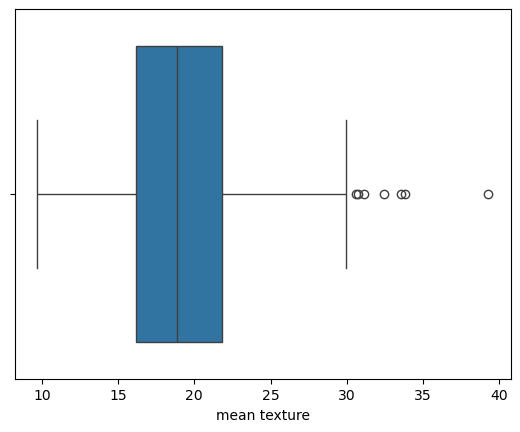

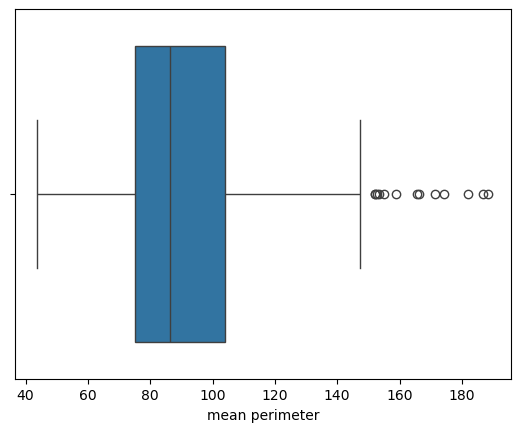

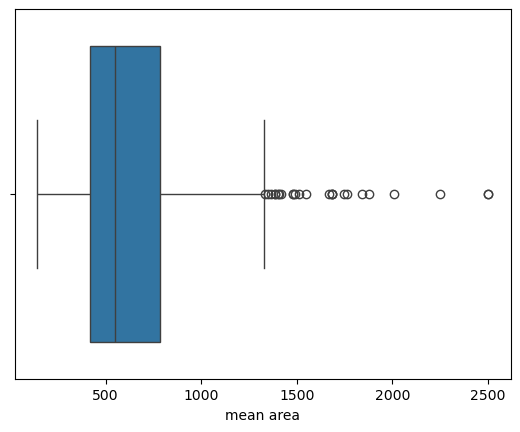

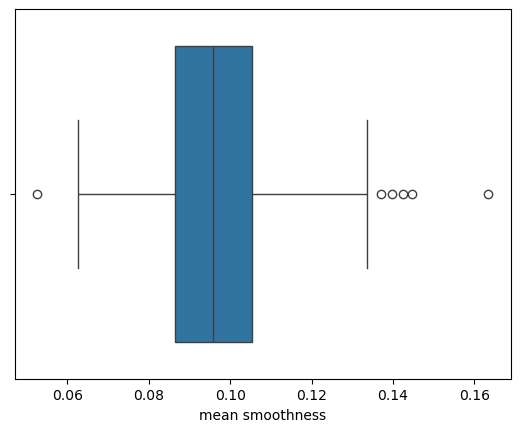

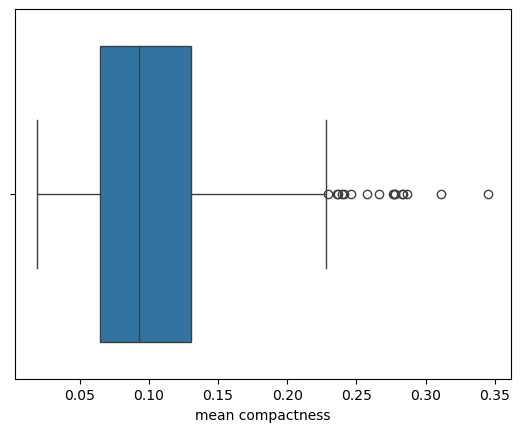

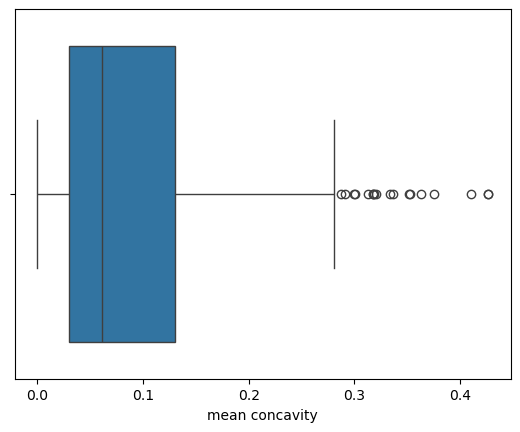

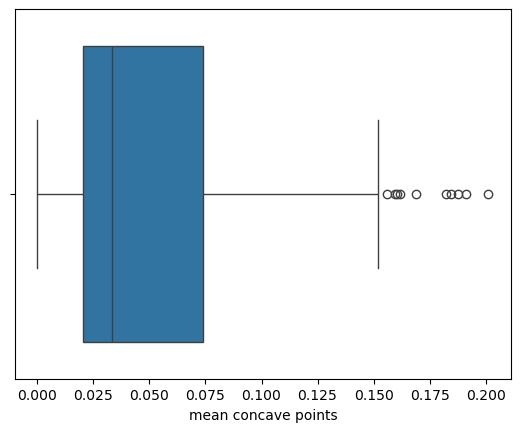

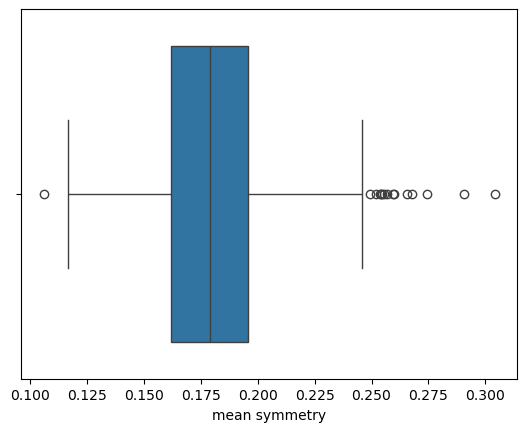

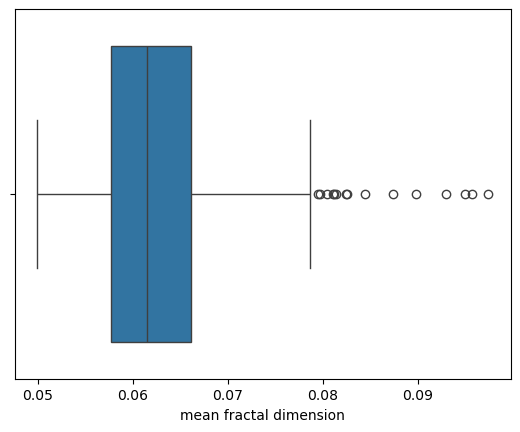

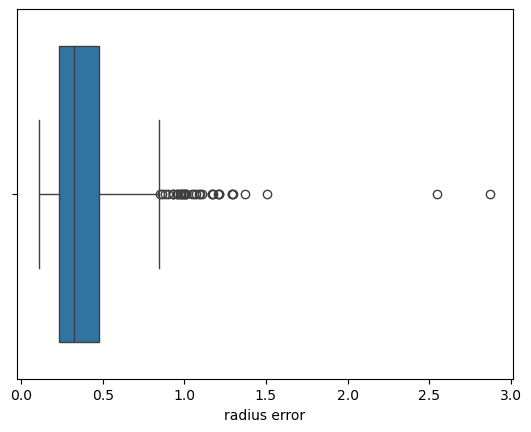

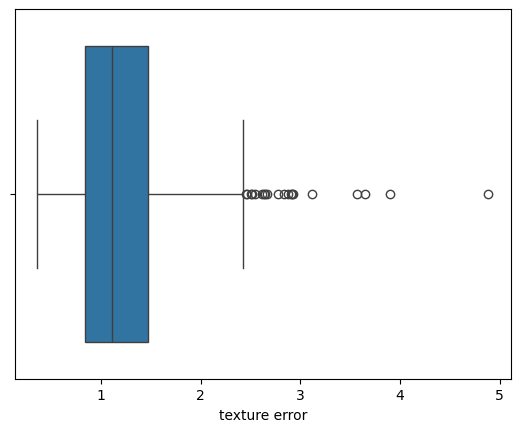

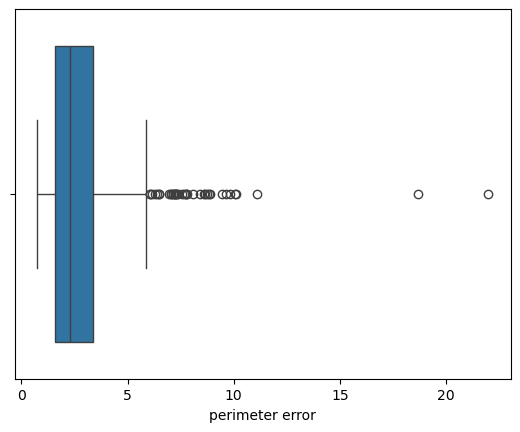

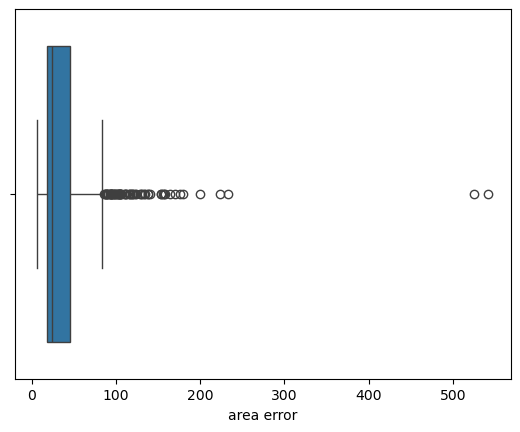

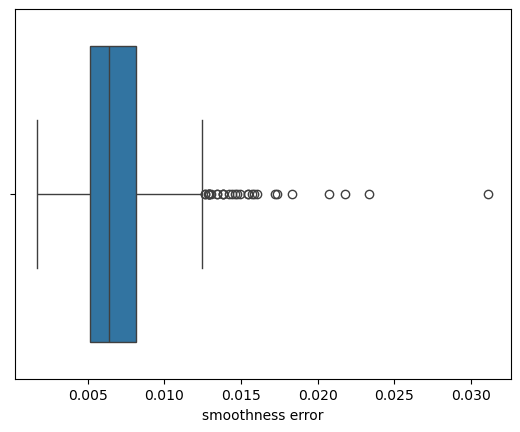

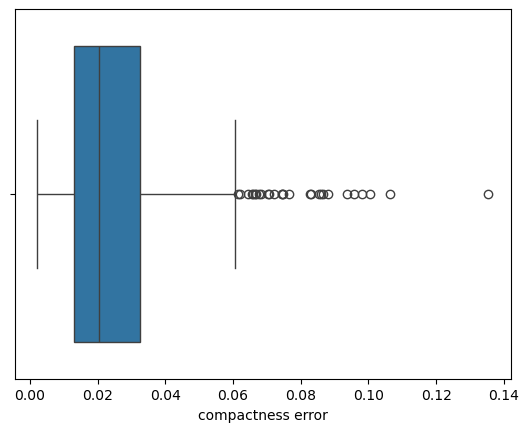

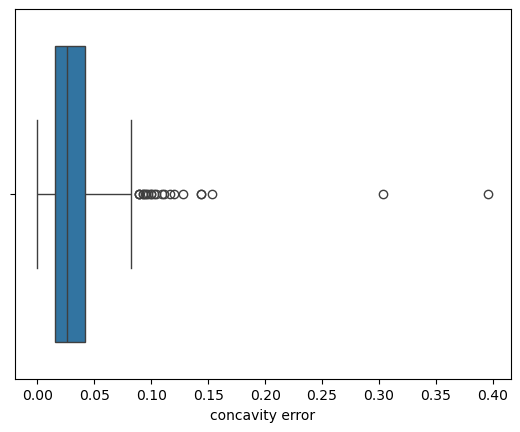

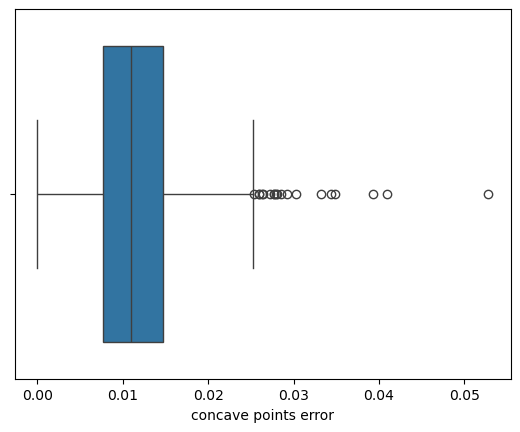

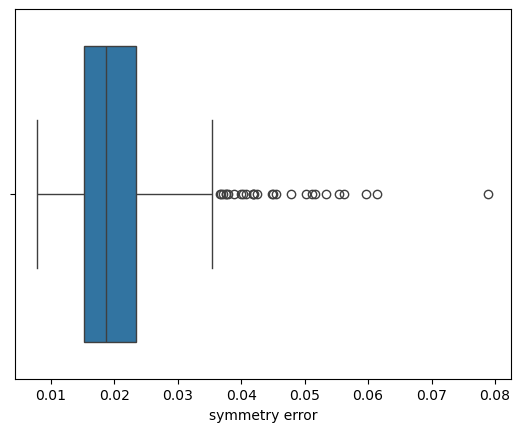

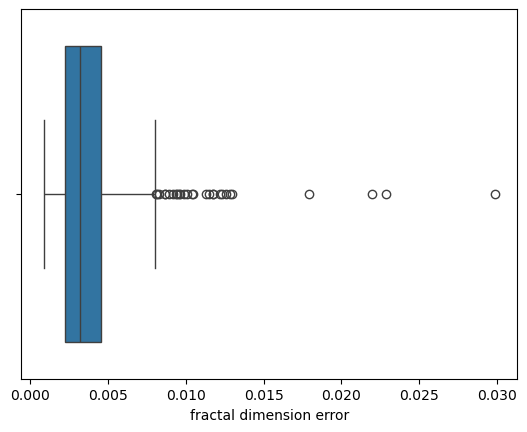

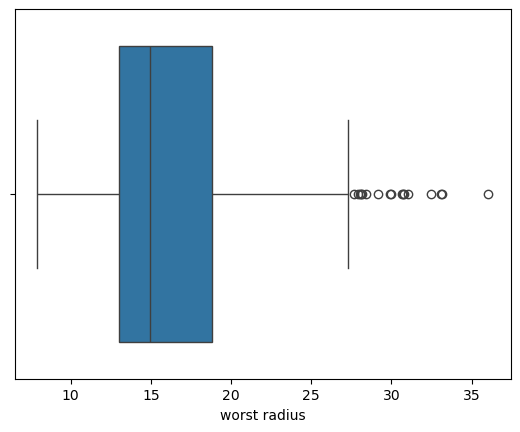

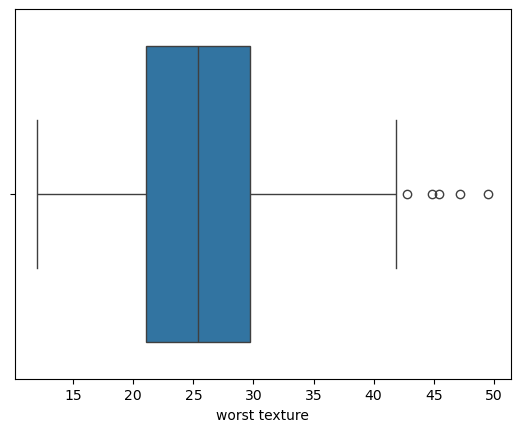

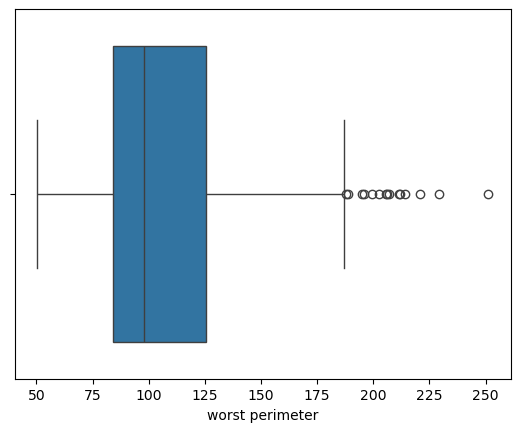

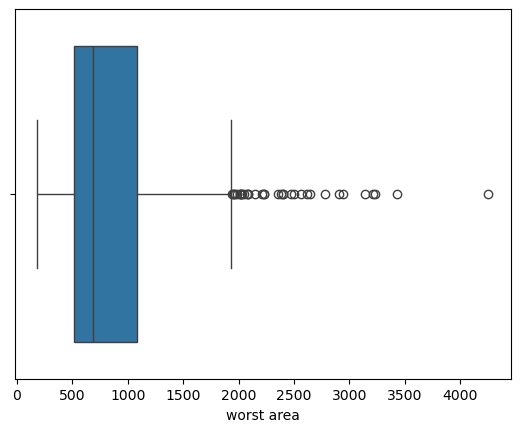

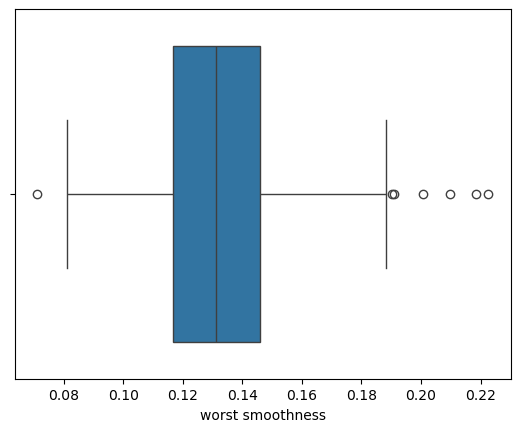

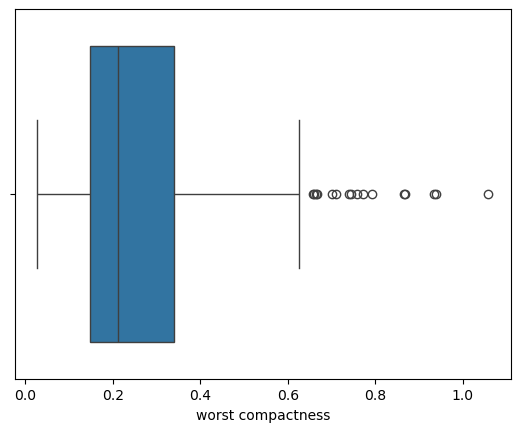

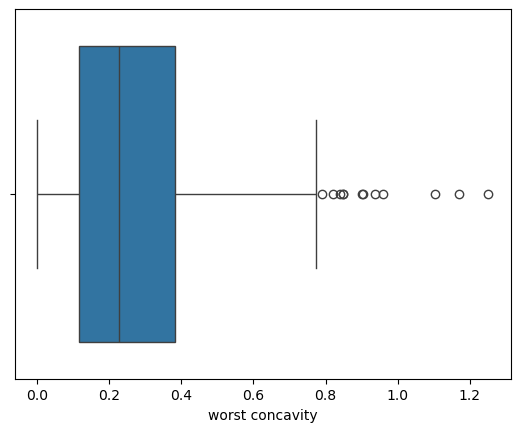

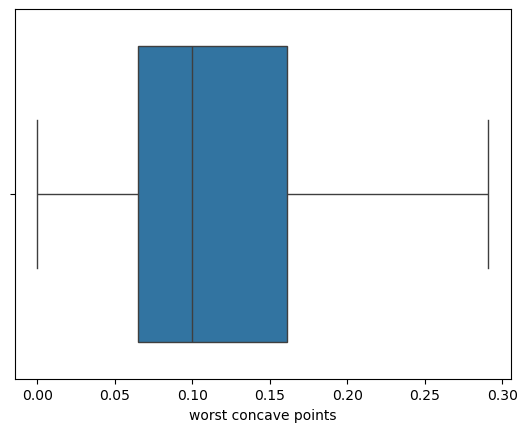

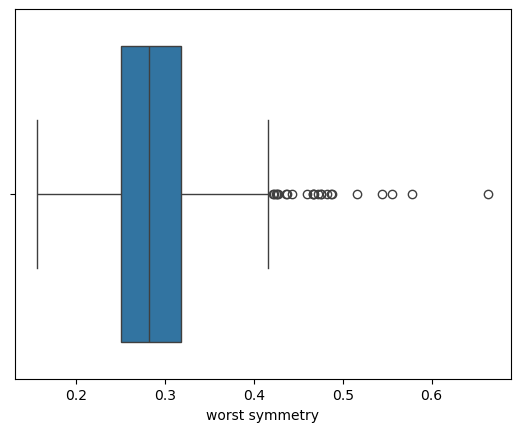

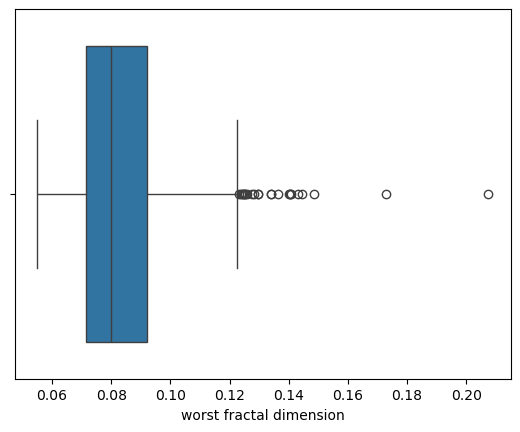

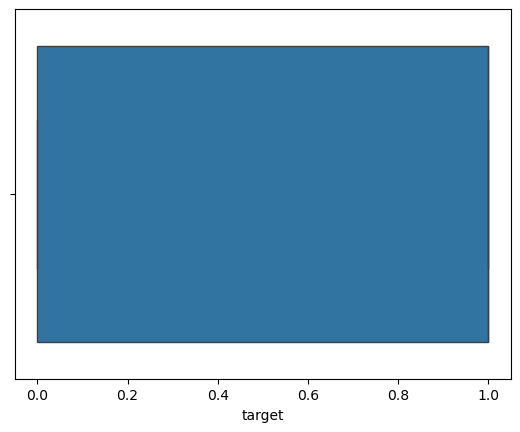

In [16]:
for i in num_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

#### We understand that our data contains several outliers. To address this, we are using the Interquartile Range (IQR) method to identify and remove these outliers effectively

In [17]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [18]:
#store to new df1
df1=outliers(df)

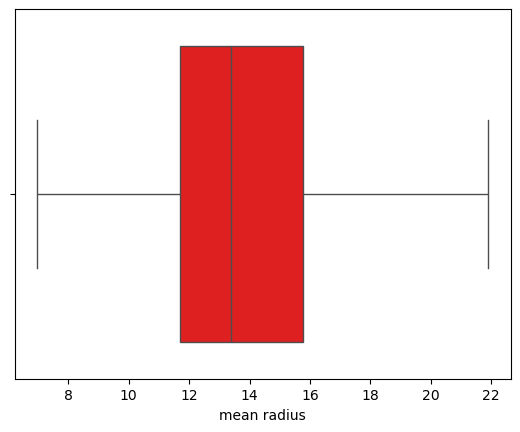

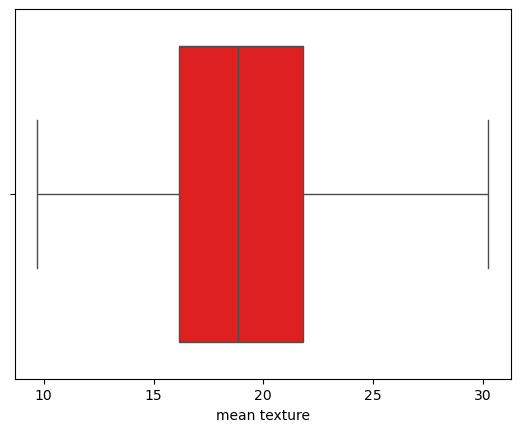

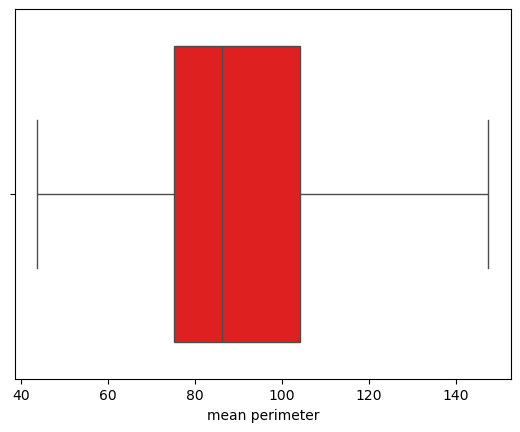

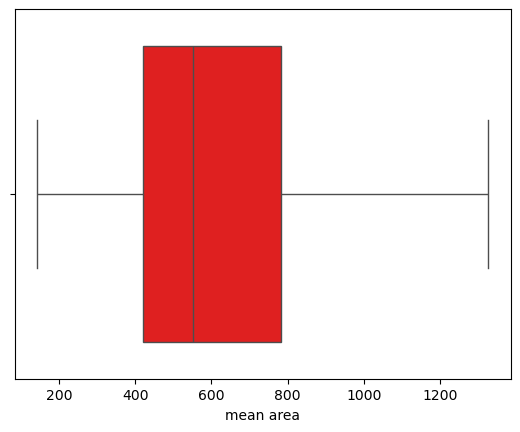

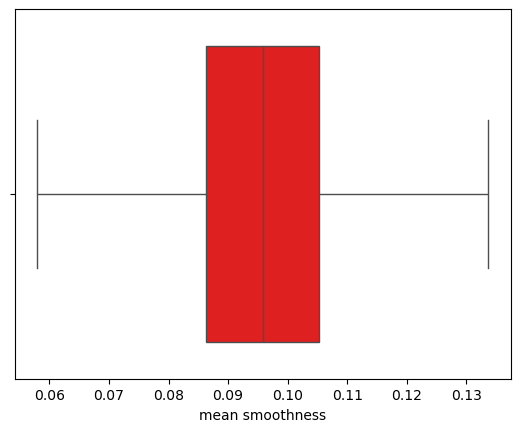

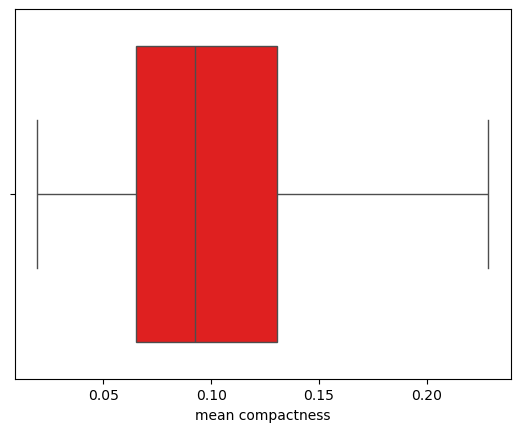

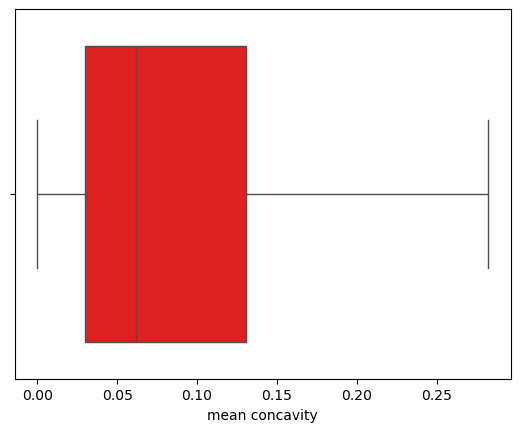

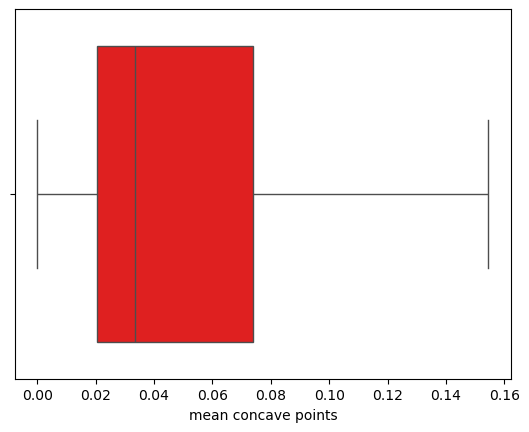

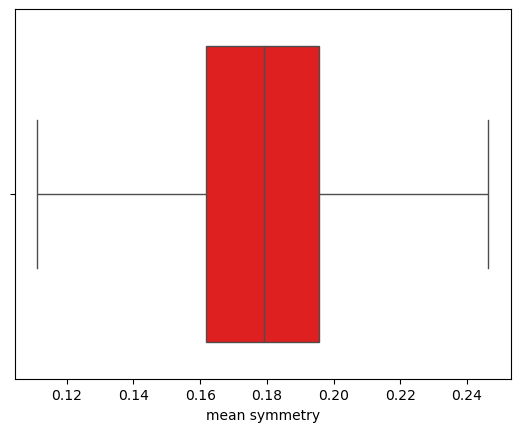

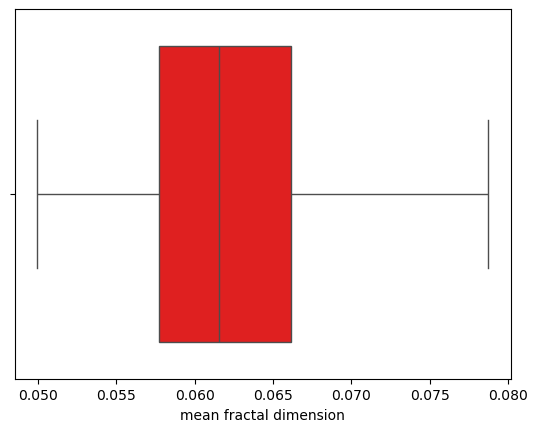

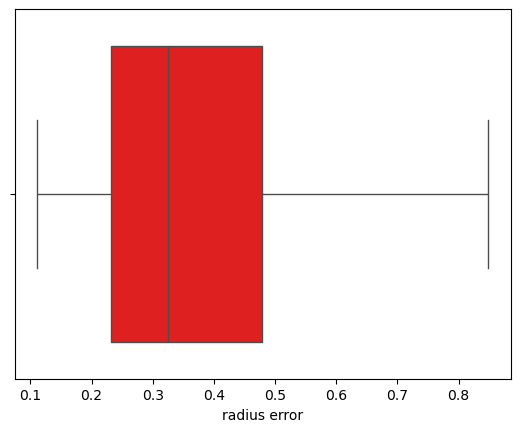

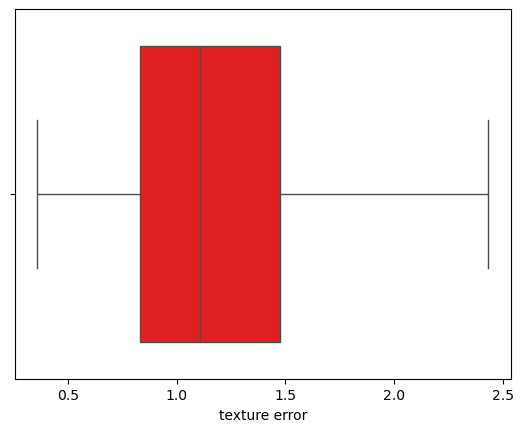

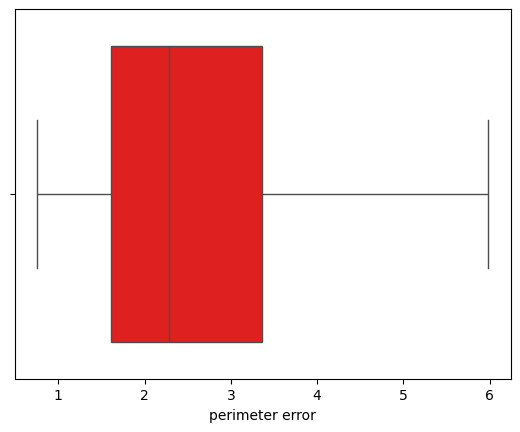

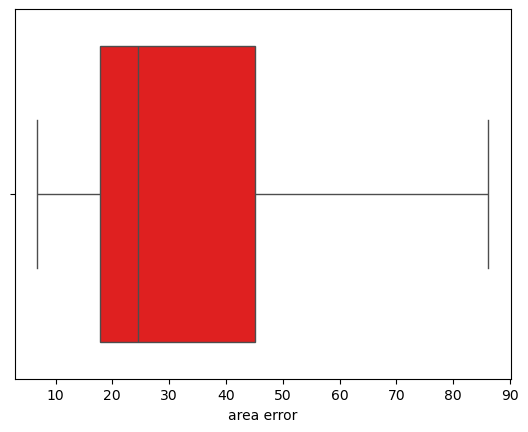

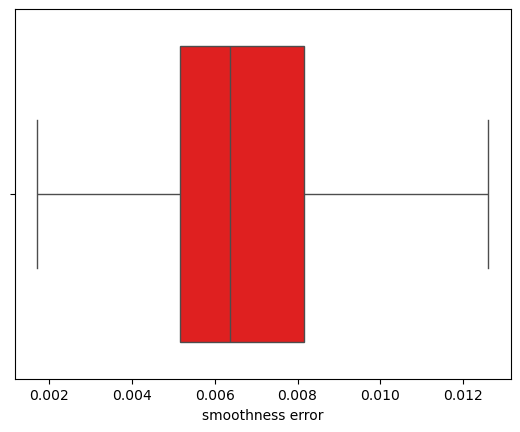

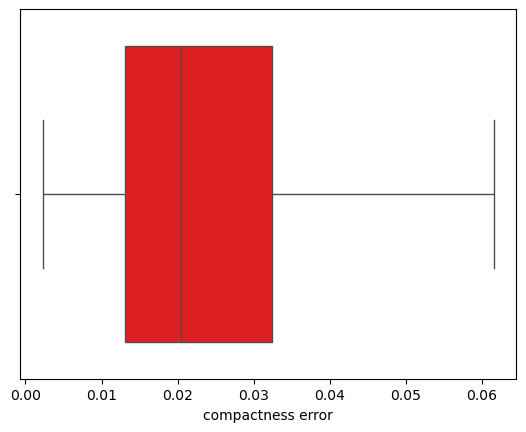

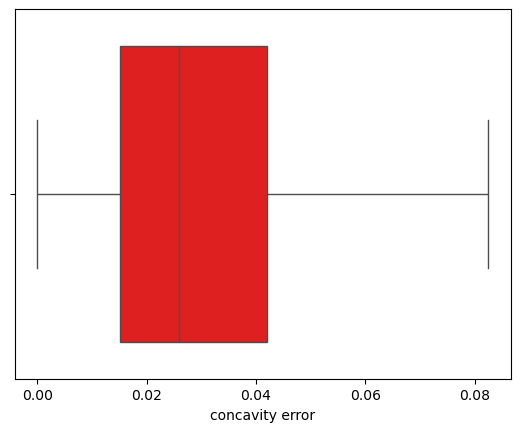

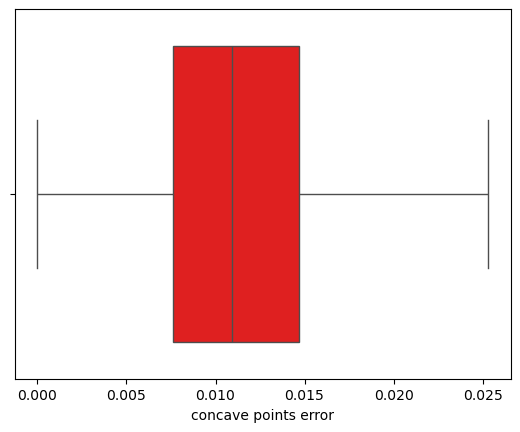

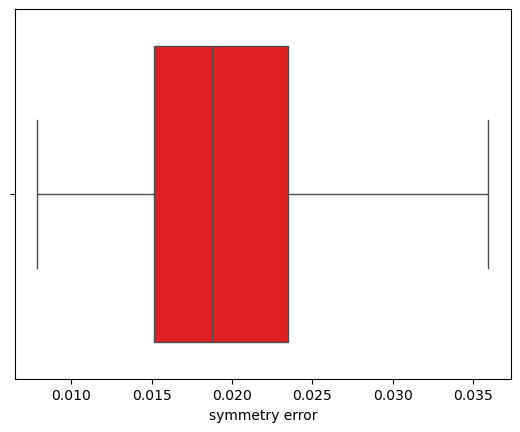

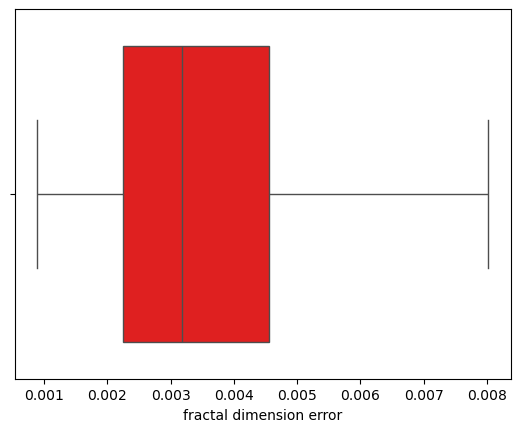

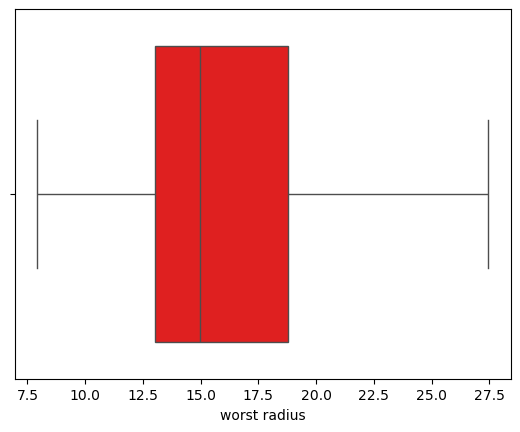

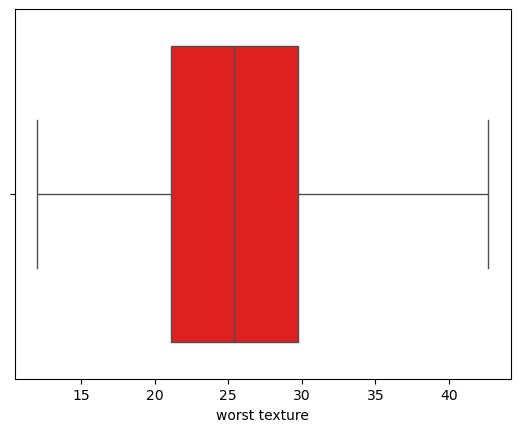

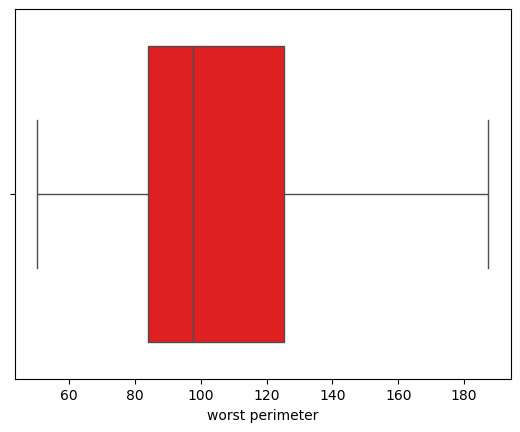

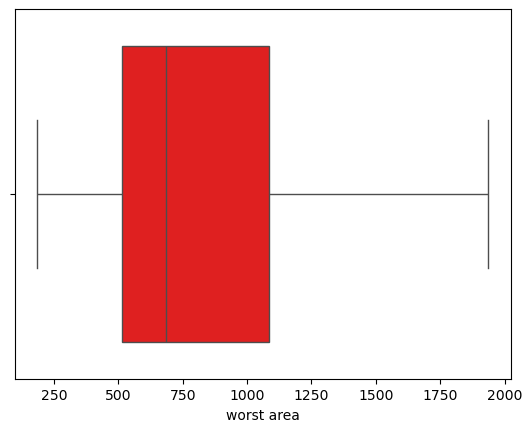

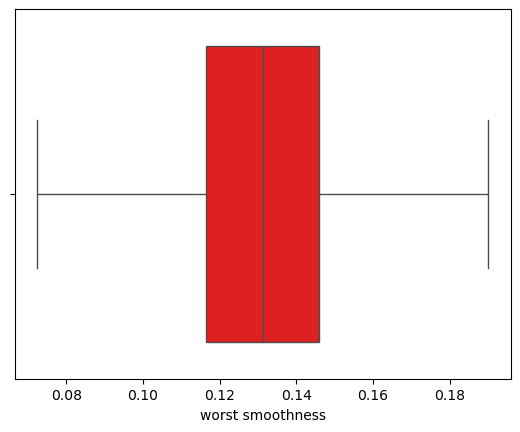

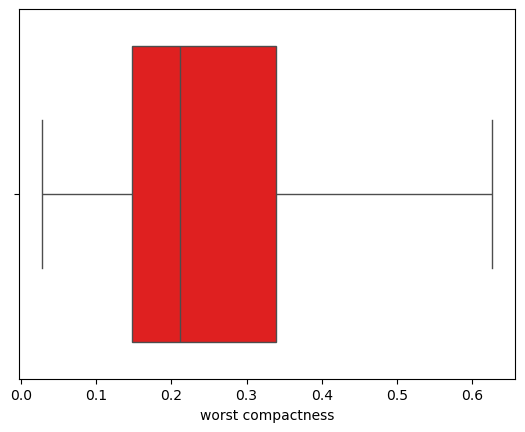

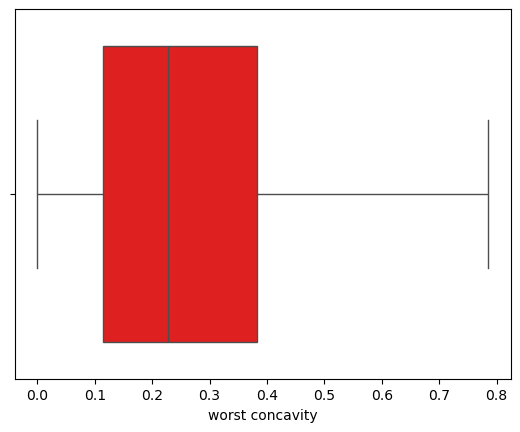

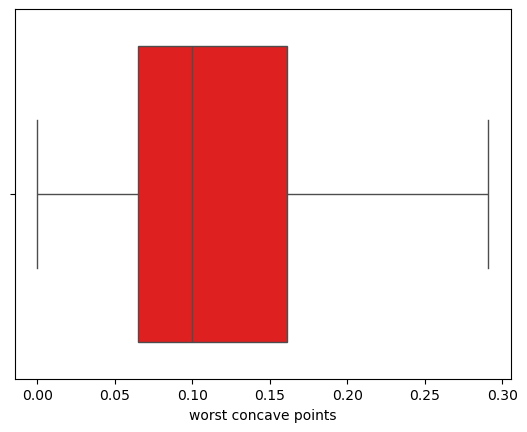

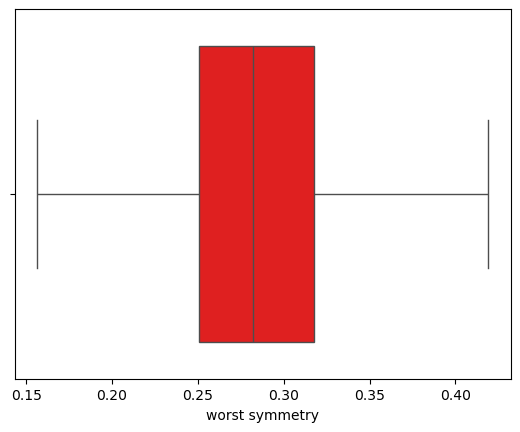

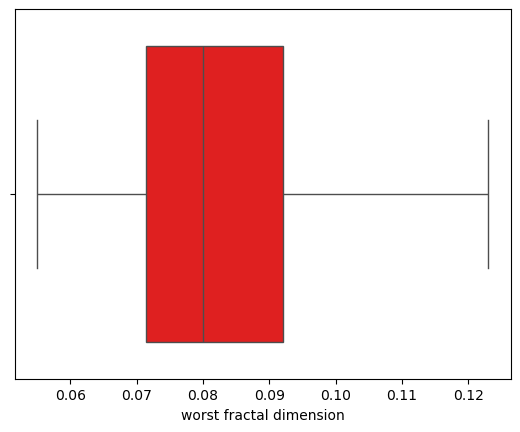

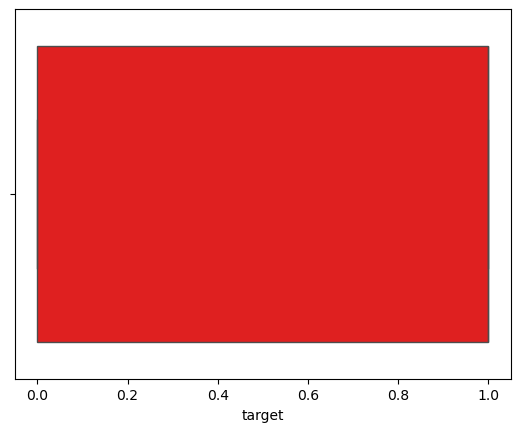

In [19]:
#checking outilers
for i in num_columns.columns:
    sns.boxplot(data=df1,x=i,color='r')
    plt.show()

## After applying the IQR method, we can see that there are no more outliers in the data. Next, we can proceed to check the skewness of the data to evaluate its distribution. 

In [20]:
#cheking skew
df1.skew()  

mean radius                0.655953
mean texture               0.449700
mean perimeter             0.701081
mean area                  0.922884
mean smoothness            0.257712
mean compactness           0.826755
mean concavity             1.023859
mean concave points        1.004049
mean symmetry              0.403621
mean fractal dimension     0.682430
radius error               1.025031
texture error              0.740987
perimeter error            1.034389
area error                 1.130940
smoothness error           0.780923
compactness error          0.990285
concavity error            0.916740
concave points error       0.539571
symmetry error             0.869297
fractal dimension error    0.979344
worst radius               0.849779
worst texture              0.386858
worst perimeter            0.874870
worst area                 1.048970
worst smoothness           0.247199
worst compactness          0.915295
worst concavity            0.809174
worst concave points       0

## Observations:
#### 0 => No Skew, 1 => High Skew
In this case, we do not need to remove skewness from the data.
If needed, skewness can be addressed using algorithms such as the Power Transformer or techniques like logarithmic (log) transformation or square root (sqrt) transformation.


In [21]:
#here we are using PowerTransformer algorithm
from sklearn.preprocessing import PowerTransformer

In [22]:
pt=PowerTransformer(method='yeo-johnson')  

In [23]:
#we want to convert every columns to numerical
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns

In [24]:
df1[numerical_features] = pt.fit_transform(df1[numerical_features]) #fit to pt

In [25]:
df1[numerical_features].skew()  #skew 0 or -0 

mean radius                0.011115
mean texture              -0.002533
mean perimeter             0.010112
mean area                  0.005457
mean smoothness            0.006193
mean compactness           0.102176
mean concavity             0.210993
mean concave points        0.194157
mean symmetry              0.005121
mean fractal dimension     0.049092
radius error               0.157291
texture error              0.021078
perimeter error            0.070418
area error                 0.056353
smoothness error           0.075000
compactness error          0.170630
concavity error            0.102595
concave points error       0.006558
symmetry error             0.109069
fractal dimension error    0.151253
worst radius               0.034750
worst texture             -0.008927
worst perimeter            0.031901
worst area                 0.024929
worst smoothness           0.005460
worst compactness          0.089849
worst concavity            0.083315
worst concave points       0

In [26]:
df2=df1[numerical_features] # store to  df2

## correlation 
Correlation measures the strength and direction of the relationship between two variables.

In [27]:
correlation=df2.corr()

In [28]:
correlation

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.321373,0.997968,0.999115,0.150890,0.484556,0.652054,0.774812,0.120061,-0.371560,...,0.979838,0.304471,0.974283,0.979266,0.109585,0.472190,0.580737,0.734704,0.171919,0.008051
mean texture,0.321373,1.000000,0.326242,0.324983,-0.010100,0.242076,0.322642,0.288534,0.088221,-0.072064,...,0.345475,0.915678,0.351471,0.347021,0.074394,0.268239,0.308470,0.290785,0.108986,0.099925
mean perimeter,0.997968,0.326242,1.000000,0.996713,0.187436,0.533605,0.690423,0.804306,0.151189,-0.323931,...,0.980834,0.310327,0.979945,0.979793,0.141123,0.516655,0.618416,0.764915,0.195117,0.053900
mean area,0.999115,0.324983,0.996713,1.000000,0.140765,0.476332,0.649699,0.771287,0.114964,-0.379026,...,0.980866,0.308955,0.974781,0.981810,0.104868,0.467337,0.578902,0.730620,0.170006,0.004533
mean smoothness,0.150890,-0.010100,0.187436,0.140765,1.000000,0.682412,0.522411,0.573048,0.549490,0.582149,...,0.201616,0.043930,0.225441,0.190747,0.815548,0.492567,0.437150,0.510229,0.391831,0.507744
mean compactness,0.484556,0.242076,0.533605,0.476332,0.682412,1.000000,0.896043,0.848727,0.557946,0.513909,...,0.526143,0.251278,0.577100,0.516657,0.595169,0.902761,0.840882,0.830233,0.469969,0.697778
mean concavity,0.652054,0.322642,0.690423,0.649699,0.522411,0.896043,1.000000,0.934466,0.452144,0.266175,...,0.683486,0.332691,0.723213,0.679750,0.488336,0.841544,0.933353,0.905807,0.398058,0.542543
mean concave points,0.774812,0.288534,0.804306,0.771287,0.573048,0.848727,0.934466,1.000000,0.438912,0.138027,...,0.799331,0.299565,0.824486,0.794084,0.495510,0.754082,0.826696,0.939414,0.374764,0.414247
mean symmetry,0.120061,0.088221,0.151189,0.114964,0.549490,0.557946,0.452144,0.438912,1.000000,0.437415,...,0.162419,0.106187,0.189066,0.156539,0.434842,0.452321,0.402213,0.407920,0.719068,0.426333
mean fractal dimension,-0.371560,-0.072064,-0.323931,-0.379026,0.582149,0.513909,0.266175,0.138027,0.437415,1.000000,...,-0.318147,-0.046100,-0.270481,-0.325527,0.501857,0.417765,0.263094,0.143573,0.304001,0.777831


### Visualize the correlation using a heatmap.

Text(0.5, 1.0, 'correlation of breast cancer data')

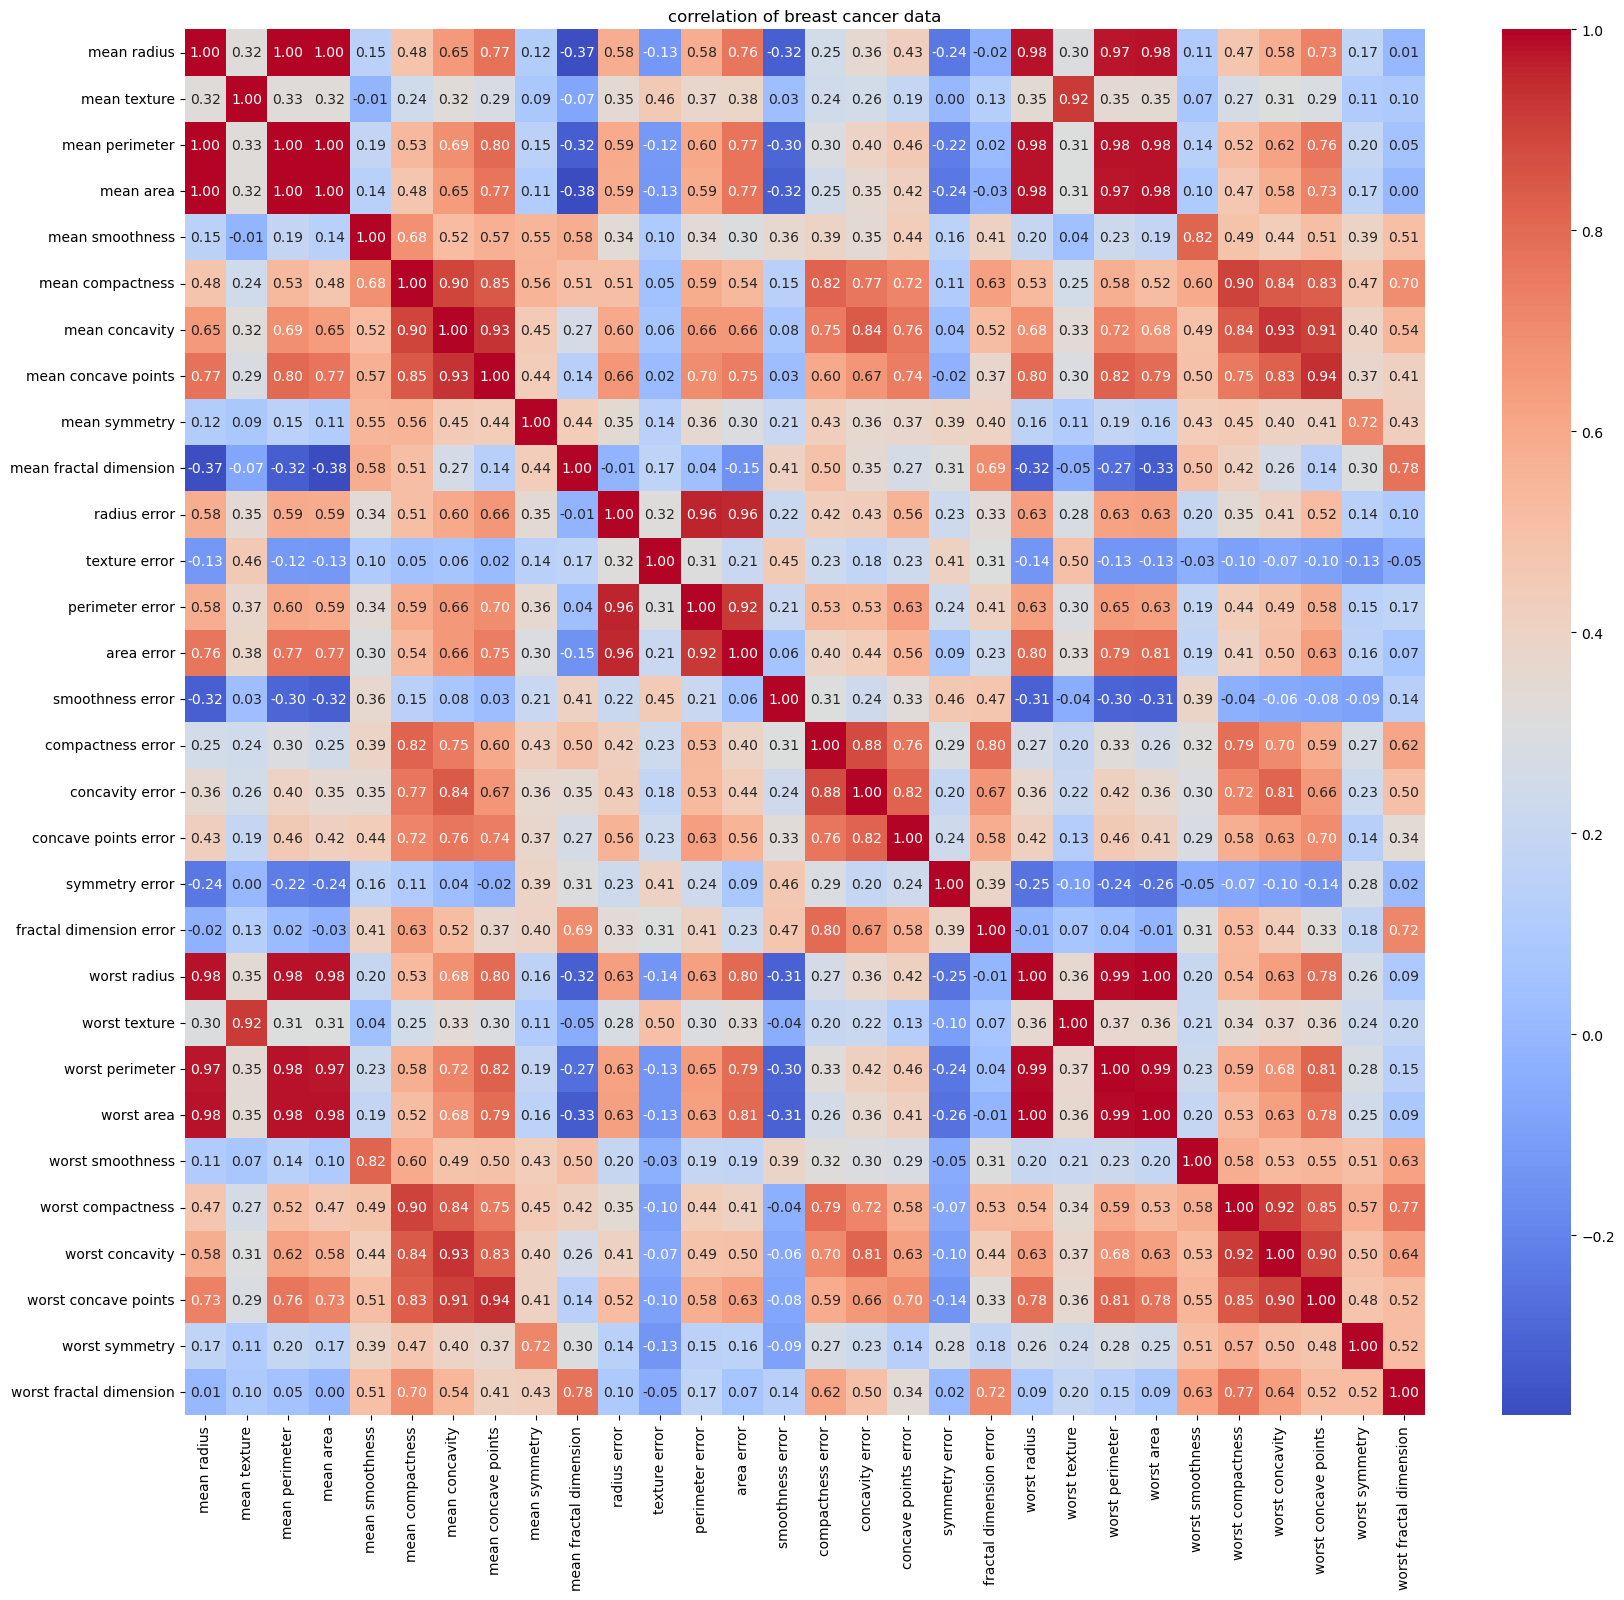

In [29]:
plt.figure(figsize=(20,18))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')  #annot=>True(value) #fmt=decimal #cmap =color
plt.title("correlation of breast cancer data")

## feature selection
feature having close relation with target column

In [30]:
#FS TWO TYPES
#1.SELECTKBEST
#2. WRAPPER


from sklearn.feature_selection import SelectKBest,f_classif   #f_classif= CLASSIFICATION

In [31]:
x=df2
y=df['target']

In [32]:
sk=SelectKBest(score_func=f_classif,k=10) #score=classification ,k=anything we can give or 'all'
x_new=sk.fit_transform(x,y) #fit alogorthm

In [33]:
# Get selected feature names and scores
selected_features = x.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')

Feature Scores:
                    Feature       Score
7       mean concave points  979.985907
22          worst perimeter  914.408374
23               worst area  886.559410
27     worst concave points  867.101698
20             worst radius  866.414171
6            mean concavity  717.592998
2            mean perimeter  679.260137
3                 mean area  642.004466
13               area error  624.107657
0               mean radius  623.817127
26          worst concavity  525.741746
12          perimeter error  382.985870
10             radius error  374.097181
5          mean compactness  332.050587
25        worst compactness  328.905900
21            worst texture  153.754387
17     concave points error  153.268894
16          concavity erro

In [34]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [35]:
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.172665,-2.612999,1.303242,1.193223,1.557672,1.939324,1.847560,1.868961,2.098277,2.032972,...,1.674752,-1.485029,1.875194,1.722638,1.318152,1.955096,1.788953,1.935654,2.124369,1.825134
1,1.697216,-0.277545,1.592976,1.769690,-0.835257,-0.394789,0.291323,0.823315,0.089075,-0.966260,...,1.630964,-0.297203,1.470361,1.722638,-0.340392,-0.310179,0.061441,1.101594,-0.156175,0.539083
2,1.528511,0.549105,1.512824,1.571529,0.984093,1.190133,1.427109,1.699287,1.019624,-0.312741,...,1.461711,0.064832,1.355625,1.525947,0.580950,1.244939,1.020042,1.722744,1.330307,0.452639
3,-0.772484,0.353712,-0.529022,-0.856072,2.477331,1.939324,1.675749,1.433838,2.223162,2.036229,...,-0.092184,0.223334,-0.047328,-0.456800,2.374851,1.955096,1.729494,1.862378,2.124369,1.944290
4,1.644585,-1.236456,1.652264,1.724810,0.339512,0.769721,1.431056,1.421547,0.077429,-0.530401,...,1.328266,-1.630888,1.349978,1.394803,0.276411,-0.145016,0.824580,0.807077,-0.969692,-0.294213


In [36]:
y.unique()

array([0, 1])

### feature scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
from sklearn.model_selection import train_test_split  # split the Data

In [40]:
x_scaled = scaler.fit_transform(x)
# x_scaled

In [41]:
# traing 80 ,test 20
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size=0.2 , random_state =42)

## Classification Algorithm Implementation 

Implement the following five classification algorithms: 

    1. Logistic Regression 2.Decision Tree Classifier
    
    3. Random Forest Classifier 4. Support Vector Machine (SVM) 
    
    5. k-Nearest Neighbors (k-NN) 
For each algorithm,provide a brief description of how it works and why it might be suitable for this dataset.

## Model 1 -Logistic regression - classification algm

In [42]:
 from sklearn.linear_model import LogisticRegression  

In [43]:
model_1 = LogisticRegression() #initilaizing

In [44]:
# fitting to logisticregressionmodel 
model_1.fit(x_train,y_train)

LogisticRegression()

In [45]:
#prediction
y_pred = model_1.predict(x_test)

In [46]:
# y_pred

In [47]:
#check matching between predicted and actual value
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)

In [49]:
accurancy = accuracy_score(y_test,y_pred)

In [50]:
accurancy 

# accuracy score between 0 and 1
# 0.5 < accuracy score is ok
# 100% accuracy is wrong it cause over fitting

0.9824561403508771

In [51]:
#confuiion matrix
cm =confusion_matrix(y_test,y_pred)


<Axes: >

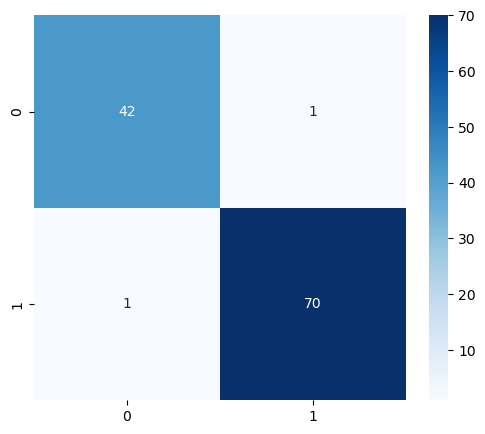

In [52]:
#confusion  matrix using heatmap 
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True, cmap='Blues')

In [53]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## model 2 -DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model2 = DecisionTreeClassifier()#max_depth

In [56]:
#fit to ds
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
#yPredict  20% data 
ydp = model2.predict(x_test)

In [58]:
accu_2 = accuracy_score(y_test,ydp)

In [59]:
accu_2

0.9385964912280702

In [60]:
#classification report

print(classification_report(y_test,ydp))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [61]:
#confuiion matrix
c1 =confusion_matrix(y_test,ydp)

<Axes: >

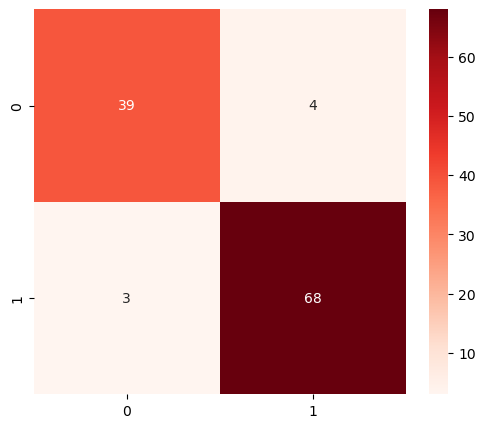

In [62]:
plt.figure(figsize=(6,5))
sns.heatmap(c1,annot=True, cmap='Reds')  #Yellows ,#greens

## model 3 -GaussianNB

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
Model3 = GaussianNB()

In [65]:
Model3.fit(x_train,y_train)

GaussianNB()

In [66]:
Ynb = Model3.predict(x_test)

In [67]:
#evaluavtion

ac = accuracy_score(y_test,Ynb)

In [68]:
ac

0.9736842105263158

In [69]:
print(classification_report(y_test,Ynb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [70]:
#confuiion matrix
c3 =confusion_matrix(y_test,Ynb)

<Axes: >

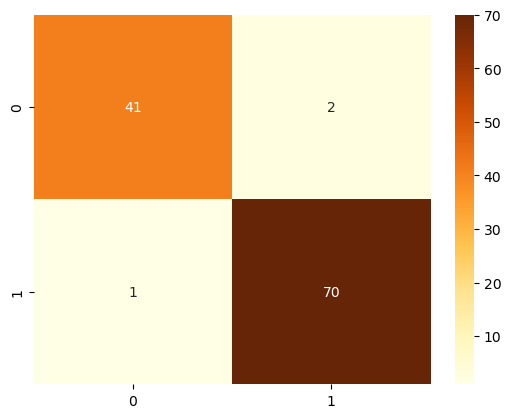

In [71]:
sns.heatmap(c3,annot=True, cmap='YlOrBr') #oranges #YlOrBr #Purples  #YlGnBu  

## Model 4 ->SVM=>SVC

In [72]:
from sklearn.svm import SVC

In [73]:
md4 = SVC()

In [74]:
md4.fit(x_train,y_train)

SVC()

In [75]:
#predict
svc_y = md4.predict(x_test)

In [76]:
#evaluavtion  

ac = accuracy_score(y_test,svc_y)   

In [77]:
ac

0.9736842105263158

In [78]:
#classification report f1score,accurance matrix 
print("Accuracy:", accuracy_score(y_test, svc_y))
print("Precision:", precision_score(y_test, svc_y))
print("Recall:", recall_score(y_test, svc_y))
print("F1 Score:", f1_score(y_test, svc_y))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


In [79]:
print(classification_report(y_test,svc_y))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [80]:
c4 =confusion_matrix(y_test,svc_y)

<Axes: >

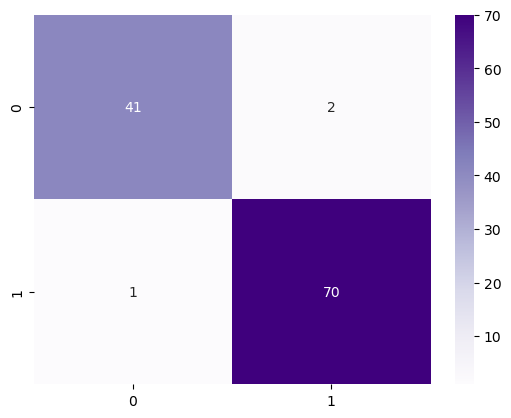

In [81]:
sns.heatmap(c4,annot=True, cmap='Purples')

 ## ROC curve (Receiver Operating Characteristic curve)

 true positvie 
 False neagative
 

In [82]:
 roc = roc_auc_score(y_test,svc_y) #receiver operating characteristic (ROC)

In [83]:
roc

0.969701932525385

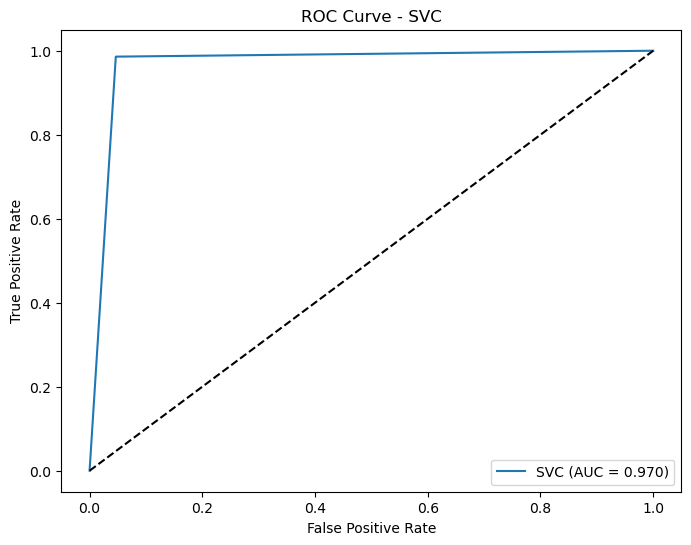

In [84]:
# ROC Curve  
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, svc_y)
plt.plot(fpr_lr, tpr_lr, label=f'SVC (AUC = {roc_auc_score(y_test, svc_y):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend()
plt.show()

## MODEL 5 =ensemble Learning  

In [85]:

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [86]:
model5 = RandomForestClassifier()

In [87]:
model5.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
YpredRf = model5.predict(x_test)

In [89]:
acc5 = accuracy_score(y_test,YpredRf)

In [90]:
acc5

0.9649122807017544

In [91]:
model6 = RandomForestClassifier(max_depth=5,n_estimators=200)  #max_depoth=none,5,10.... n_estimators

In [92]:
 model6.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [93]:
ypredRf = model6.predict(x_test)

In [94]:
acc6 = accuracy_score(y_test,ypredRf)

In [95]:
acc6

0.9649122807017544

## Boosting
## model 7 = GradientBoostingClassifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [97]:
mdl7 = GradientBoostingClassifier()

In [98]:
mdl7.fit(x_train,y_train)

GradientBoostingClassifier()

In [99]:
YpredGradient = mdl7.predict(x_test)

In [100]:
acc7 = accuracy_score(y_test,YpredGradient)

In [101]:
acc7

0.956140350877193

## MODEl 7 , KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
mdl7 = KNeighborsClassifier()

In [104]:
mdl7.fit(x_train,y_train)

KNeighborsClassifier()

In [105]:
ypknn = mdl7.predict(x_test)

  File "C:\Users\aadil\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aadil\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aadil\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aadil\AppData\Local\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [106]:
#evaluation
accurancy = accuracy_score(y_test,ypknn)


In [107]:
cm = confusion_matrix(y_test,ypknn)

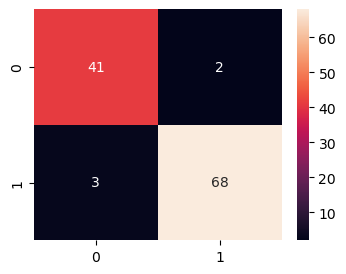

In [108]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,color='Blue')
plt.show()

In [109]:
print( classification_report(y_test,ypknn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



#### We observe that we are implementing each algorithm in multiple steps. To simplify and streamline the process, we can create a dictionary as follows:

In [110]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [111]:
results={}

In [112]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(results[name]['report'])


Training Logistic Regression...
Logistic Regression Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Training SVM...
SVM Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Training Decision Tree...
Decision Tree Accuracy: 0.9298

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43

### Model Comparison 

Compare the performance of the five classification algorithms. Which algorithm performed the best and which one performed the worst?

In [113]:
#we should find which is best model is
# Find the best model
best_model_name = max(results.items(),key=lambda x: x[1]['accuracy'])[0]
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {results[best_model_name]['accuracy']:.4f}")


Best Model: Logistic Regression
Best Accuracy: 0.9825


In [114]:
# Find the worst model
worst_model_name = min(results.items(), key=lambda x: x[1]['accuracy'])[0]
worst_model = results[worst_model_name]['model']
print(f"\n Worst Model: {worst_model_name}")
print(f"Worst Accuracy: {results[worst_model_name]['accuracy']:.4f}")


 Worst Model: Decision Tree
Worst Accuracy: 0.9298
